In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [118]:
df_users = pd.read_csv('./data/users.csv')

In [95]:
df_users.head(5)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [96]:
df_users.nbr_ratings

0         7820
1         2521
2         1797
3           31
4          604
          ... 
153699       1
153700       1
153701       1
153702       1
153703       1
Name: nbr_ratings, Length: 153704, dtype: int64

In [105]:
np.log(df_users.nbr_ratings.max()).round()

9.0

In [109]:
np.log(df_users.nbr_ratings)

0         8.964440
1         7.832411
2         7.493874
3         3.433987
4         6.403574
            ...   
153699    0.000000
153700    0.000000
153701    0.000000
153702    0.000000
153703    0.000000
Name: nbr_ratings, Length: 153704, dtype: float64

In [110]:
import plotly.express as px
import numpy as np


# create the bins
counts, bins = np.histogram(df_users.nbr_ratings, bins=range(0, df_users.nbr_ratings.max(), 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'}, log_y = True)
fig.show()

In [135]:
df_users[df_users['user_name'] == '-Rick']

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
13429,590,194,-rick.912339,-Rick,1.419246e+09,"United States, Massachusetts"


In [134]:
import plotly.express as px
import numpy as np

#df_users_cut = df_users[df_users.nbr_ratings < 1500]
# create the bins
counts, bins = np.histogram(df_users.nbr_ratings, bins=range(0, df_users.nbr_ratings.max(), 20))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x' : 'Number of Ratings', 'y' : 'Number of Users'}, title = 'Histogram of the number of users per number of ratings (bins of size 20)',log_y=True)
fig.show()
#fig.write_html('./plots/histogramstyle.html')

In [37]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

In [7]:
real_beers = pd.read_csv('./data/beers.csv')

In [8]:
real_beers.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [9]:
real_beers.shape[0]

280823

In [100]:
df_users = pd.read_csv('./data/df_real_user.csv')

In [101]:
df_users = pd.read_pickle('./data/df_reviews_filtered_officiel.pkl')

In [102]:
df_users.head(5)

,beer_id,style,abv,date,user_name,appearance,aroma,palate,taste,overall,rating,category,rating number,sum,sum cat,ratio
4644174,167,Witbier,NaN,2001-03-16,frank4sail,4.5,4.5,4.0,5.0,5.0,4.75,Wheat Beers,0,5515,321,0.058205
53525,73,Milk / Sweet Stout,5.20,2001-06-18,Mark,5.0,5.0,5.0,5.0,5.0,5.00,Stouts,0,5515,777,0.140888
930333,3558,Czech Pilsener,5.00,2001-06-18,Mark,4.0,4.0,3.0,4.0,4.0,3.90,Pale Lagers,1,5515,449,0.081414
398915,261,Vienna Lager,4.48,2001-06-24,Mark,4.0,3.0,3.0,3.0,3.0,3.06,Dark Lagers,2,5515,144,0.026111
1303496,87,American Pale Ale (APA),5.40,2001-06-24,Mark,4.0,4.0,1.0,3.0,3.0,3.10,Pale Ales,3,5515,842,0.152675


In [103]:
#number of users we consider in the end
df_users.user_name.nunique()

1646

In [104]:
#number of ratings they made
tot_nb_ratings = df_users.groupby('user_name').size().sum()
print(tot_nb_ratings)
print(1646*500)
print("they all have made 500 ratings")

823000
823000
they all have made 500 ratings


In [105]:
# we want to look at how these 500 ratings are distributed through time

In [106]:
df_users.head(5)

,beer_id,style,abv,date,user_name,appearance,aroma,palate,taste,overall,rating,category,rating number,sum,sum cat,ratio
4644174,167,Witbier,NaN,2001-03-16,frank4sail,4.5,4.5,4.0,5.0,5.0,4.75,Wheat Beers,0,5515,321,0.058205
53525,73,Milk / Sweet Stout,5.20,2001-06-18,Mark,5.0,5.0,5.0,5.0,5.0,5.00,Stouts,0,5515,777,0.140888
930333,3558,Czech Pilsener,5.00,2001-06-18,Mark,4.0,4.0,3.0,4.0,4.0,3.90,Pale Lagers,1,5515,449,0.081414
398915,261,Vienna Lager,4.48,2001-06-24,Mark,4.0,3.0,3.0,3.0,3.0,3.06,Dark Lagers,2,5515,144,0.026111
1303496,87,American Pale Ale (APA),5.40,2001-06-24,Mark,4.0,4.0,1.0,3.0,3.0,3.10,Pale Ales,3,5515,842,0.152675


In [107]:
def min_max_date(user):
    return (user.date.min(), user.date.max())

In [108]:
#Q : how many years/months before first and last rating?
#create a new data frame with first and last rating date for each user

df_date_delta = df_users.groupby('user_name', as_index = False).apply(lambda user : user.date.min())
df_date_delta.columns = ['user_name', 'min_date']
df_date_delta['max_date'] = df_users.groupby('user_name').apply(lambda user : user.date.max()).values

In [109]:
df_date_delta.head(5)

,user_name,min_date,max_date
0,-Rick,2015-01-15,2016-04-19
1,1000lbgrizzly,2013-07-16,2016-05-02
2,1424IpA,2013-01-02,2014-05-17
3,1Sundown2C,2012-01-26,2014-10-11
4,2Xmd,2013-04-21,2015-07-06


In [141]:
df_date_delta.sort_values(by = 'max_date')

,user_name,min_date,max_date,delta
834,Wildman,2002-05-08,2003-07-17,435
729,StevieW,2002-03-23,2003-09-12,538
889,aracauna,2002-03-26,2003-10-13,566
275,ElGuapo,2002-06-20,2004-01-21,580
1182,jackndan,2002-02-27,2004-02-29,732
...,...,...,...,...
1581,twillingthenoz,2012-10-29,2017-07-20,1725
662,Ricochet,2004-07-02,2017-07-22,4768
1006,coopdog1000,2014-03-09,2017-07-23,1232
821,Walleybeer,2016-03-16,2017-07-25,496


In [110]:
df_date_delta['delta'] = (df_date_delta['max_date'] - df_date_delta['min_date']).dt.days

In [111]:
df_date_delta.head(5)

,user_name,min_date,max_date,delta
0,-Rick,2015-01-15,2016-04-19,460
1,1000lbgrizzly,2013-07-16,2016-05-02,1021
2,1424IpA,2013-01-02,2014-05-17,500
3,1Sundown2C,2012-01-26,2014-10-11,989
4,2Xmd,2013-04-21,2015-07-06,806


In [112]:
df_date_delta.shape[0]

1646

In [113]:
df_date_delta.describe()

,delta
count,1646.000000
mean,1068.128190
std,665.768928
min,366.000000
25%,629.250000
50%,877.500000
75%,1291.000000
max,5421.000000


In [114]:
df_filter = df_date_delta[df_date_delta.delta <= 365]

In [115]:
df_filter.head(5)

,user_name,min_date,max_date,delta


In [116]:
df_filter.shape[0]

0

<AxesSubplot:xlabel='delta', ylabel='Count'>

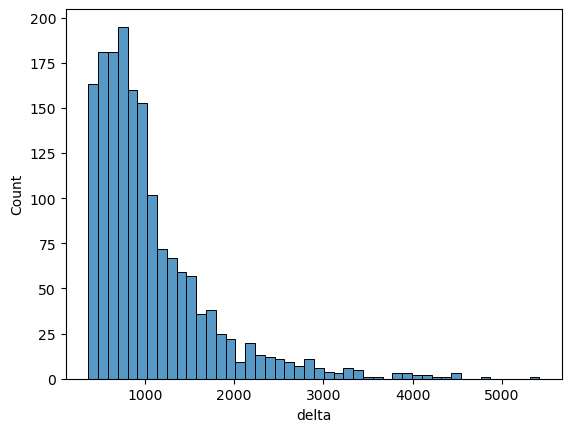

In [117]:
sns.histplot(data = df_date_delta, x = 'delta')

In [118]:
df_users.head(5)

,beer_id,style,abv,date,user_name,appearance,aroma,palate,taste,overall,rating,category,rating number,sum,sum cat,ratio
4644174,167,Witbier,NaN,2001-03-16,frank4sail,4.5,4.5,4.0,5.0,5.0,4.75,Wheat Beers,0,5515,321,0.058205
53525,73,Milk / Sweet Stout,5.20,2001-06-18,Mark,5.0,5.0,5.0,5.0,5.0,5.00,Stouts,0,5515,777,0.140888
930333,3558,Czech Pilsener,5.00,2001-06-18,Mark,4.0,4.0,3.0,4.0,4.0,3.90,Pale Lagers,1,5515,449,0.081414
398915,261,Vienna Lager,4.48,2001-06-24,Mark,4.0,3.0,3.0,3.0,3.0,3.06,Dark Lagers,2,5515,144,0.026111
1303496,87,American Pale Ale (APA),5.40,2001-06-24,Mark,4.0,4.0,1.0,3.0,3.0,3.10,Pale Ales,3,5515,842,0.152675


In [126]:
valid_users = set(df_users.user_name.to_list())

In [127]:
ba_users = pd.read_csv('./data/users.csv')

In [134]:
df_ba = ba_users[ba_users.user_name.isin(valid_users)]

In [135]:
df_ba

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,"United States, Oklahoma"
17,585,389,ferrari29.320392,ferrari29,1.239790e+09,"United States, Illinois"
33,1078,10,colsanders123.545441,ColSanders123,1.293620e+09,"United States, Georgia"
37,676,676,dodo2step.110880,Dodo2step,1.165576e+09,"United States, Pennsylvania"
56,861,861,erosier.161073,erosier,1.190801e+09,"United States, Connecticut"
...,...,...,...,...,...,...
43168,541,69,tamparainman.782764,TampaRainman,1.392635e+09,"United States, Florida"
43556,548,21,crafteyedoc.675112,CraftEyeDoc,1.336039e+09,"United States, North Carolina"
43626,630,23,pmoney.592770,pmoney,1.302862e+09,"United States, Illinois"
44819,637,48,aleckpa.541457,aleckpa,1.292843e+09,"United States, North Carolina"


In [ ]:
df_ba.groupby('location').size()

In [137]:
df_cluster = pd.read_pickle('./data/df_user_cluster.pkl')

In [138]:
df_cluster.head(5)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location,cluster
8,1131,188,okcnittany.144868,OKCNittany,1.182766e+09,"United States, Oklahoma",3
17,585,389,ferrari29.320392,ferrari29,1.239790e+09,"United States, Illinois",2
33,1078,10,colsanders123.545441,ColSanders123,1.293620e+09,"United States, Georgia",3
37,676,676,dodo2step.110880,Dodo2step,1.165576e+09,"United States, Pennsylvania",2
56,861,861,erosier.161073,erosier,1.190801e+09,"United States, Connecticut",3


In [139]:
df_cluster.shape[0]

1646